# Exercise 3 part 1

The minimiser for $f(x)$ is

$x_i = 1$ where every element in our column matrix $X_{min}$ is equal to $1$

And the minimum for $f(x)$ is zero at this value

The function $f(x)$ is convex



The minimiser for $g(x)$ is

$x_i = 1$ where every element in our column matrix $X_{min}$ is equal to $1$

And the minimum for $g(x)$ is zero at this value

The function $g(x)$ is convex

A suitable choice for our hessian matrix replacement $B_0$ would be

$B_0 = I$

This is simply because it is symmetric, positive definite and has a condition number equal to $1$

# Exercise 3 Part 2

In [ ]:
#Exercise 3 part 2 - algorithm 3 on f(x)

import numpy as np
import math as m
import time

def x_init(n):
      x = np.zeros((n,1))
      return x

def func(x,n):

    sum = 0 #since functional value is simply a sum

    for i in range(n-1):
        sum = sum + (4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2)

    return sum

def grad(x,n):

    g = np.zeros((n,1))

    g[0][0] = 16*x[0] **3 - 16*x[0]*x[1] + 2*x[0] - 2

    for i in range(1,n-1):
        g[i][0] = 16*x[i] **3 - 16*x[i]*x[i+1] + 10*x[i] - 8*x[i-1]**2 - 2

    g[n-1][0] = 8*x[n-1] - 8*x[n-2]**2

    return g


def L2_norm(g,n):

    N = 0

    for i in range(n):
        N = N + (g[i][0])**2

    return N



def BFGS_line_search(x, n, B0, toler):

    g = grad(x,n)

    while (L2_norm(g,n) > toler):

        #initialising line search parameters

        a0 = 0.9
        p = 0.5
        gamma = 0.5

        #initialising the direction parameter

        d =  - B0 @ g

        #now the line search loop

        while (func(x + a0*d,n) > func(x,n) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #initialising storage matrices
        x_old = np.zeros((n,1))
        x_new = np.zeros((n,1))

        #storing old values of x_k
        x_old = x

        #computing x_(k+1)
        x = x + a0*d

        #storing x_(k+1)
        x_new = x


        #Intitialising BFGS parameters
        s = np.zeros((n,1))
        y = np.zeros((n,1))
        I = np.identity(n)

        #giving values to these two their values
        s = x_new - x_old
        y = grad(x_new,n) - grad(x_old,n)

        #Updating B using s and y
        B0 = (I - (1/(s.T @ y))* s @ y.T) @ B0 @ (I - (1/(s.T @ y))* y @ s.T) + (1/(s.T @ y))* s @ s.T


        #now updating the gradient
        g = grad(x,n)

    return x


#now executing everything

N = np.array([1000, 2500, 5000, 7500, 10000])

toler = 10 ** (-4)

for i in range(len(N)):

    x = x_init(N[i])

    b0 = np.identity(N[i])

    start = time.time()
    x_opt = BFGS_line_search(x, N[i], b0, toler)
    stop = time.time()

    print("For n value = ", N[i])
    print("The Minimiser = ", x_opt)
    print("Time taken = ", stop-start)




For n value =  1000
The Minimiser =  [[0.99999106]
 [0.99999857]
 [0.99999734]
 [1.00000057]
 [0.99999542]
 [1.00000009]
 [0.99999568]
 [1.0000001 ]
 [0.99999648]
 [0.99999842]
 [0.99999698]
 [0.99999792]
 [0.99999872]
 [0.99999854]
 [1.00000225]
 [0.99999776]
 [1.00000243]
 [0.99999618]
 [1.0000015 ]
 [0.9999957 ]
 [1.00000348]
 [0.99999679]
 [1.00000389]
 [0.99999509]
 [1.00000125]
 [0.99999259]
 [1.00000098]
 [0.99998843]
 [1.00000409]
 [0.99998881]
 [1.00000492]
 [0.99999465]
 [1.00000257]
 [0.9999969 ]
 [1.00000734]
 [1.00000115]
 [1.00000308]
 [1.00000244]
 [0.99999214]
 [0.99999918]
 [0.99999187]
 [1.00001403]
 [0.99999042]
 [1.00000782]
 [0.99999583]
 [1.00000042]
 [0.99999492]
 [1.00000798]
 [0.99999421]
 [1.00000178]
 [0.99999945]
 [0.99999983]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.99999981]
 [0.9999998

# Exercise 3 Part 3

In [ ]:
#Exercise 3 part 3 - algorithm 3 on g(x)

import numpy as np
import math as m
import time

def x_init(n):
      x = np.zeros((n,1))
      return x

def func(x,n):

    sum = 0 #since functional value is simply a sum

    for i in range(n):
        sum = sum + ((x[0] - x[i]**2)**2 + (x[i] - 1)**2)

    return sum

def grad(x,n):

    g = np.zeros((n,1))

    sum_grad_x1 = 0

    for i in range(1,n):
        sum_grad_x1 = sum_grad_x1 + (2*x[0] - 2*x[i]**2)

    g[0][0] = sum_grad_x1 + (2*x[0] - 6*x[0]**2 + 4*x[0]**3 + 2*x[0] - 2)

    for i in range(1,n):
        g[i][0] = -4*x[0]*x[i] + 4*x[i]**3 + 2*x[i] - 2


    return g


def L2_norm(g,n):

    N = 0

    for i in range(n):
        N = N + (g[i][0])**2

    return N


def BFGS_line_search(x, n, B0, toler):

    g = grad(x,n)

    while (L2_norm(g,n) > toler):

        #initialising line search parameters

        a0 = 0.9
        p = 0.5
        gamma = 0.5

        #initialising the direction parameter

        d =  - B0 @ g

        #now the line search loop

        while (func(x + a0*d,n) > func(x,n) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #initialising storage matrices
        x_old = np.zeros((n,1))
        x_new = np.zeros((n,1))

        #storing old values of x_k
        x_old = x

        #computing x_(k+1)
        x = x + a0*d

        #storing x_(k+1)
        x_new = x


        #Intitialising BFGS parameters
        s = np.zeros((n,1))
        y = np.zeros((n,1))
        I = np.identity(n)

        #giving values to these two their values
        s = x_new - x_old
        y = grad(x_new,n) - grad(x_old,n)

        #Updating B using s and y
        B0 = (I - (1/(s.T @ y))* s @ y.T) @ B0 @ (I - (1/(s.T @ y))* y @ s.T) + (1/(s.T @ y))* s @ s.T


        #now updating the gradient
        g = grad(x,n)

    return x


#now executing everything

N = np.array([1000, 2500, 5000, 7500, 10000])

toler = 10 ** (-5)

for i in range(len(N)):

    x = x_init(N[i])

    b0 = np.identity(N[i])

    start = time.time()
    x_opt = BFGS_line_search(x, N[i], b0, toler)
    stop = time.time()

    print("For n value = ", N[i])
    print("The Minimiser = ", x_opt)
    print("Time taken = ", stop-start)




For n value =  1000
The Minimiser =  [[0.99999919]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.99999976]
 [0.9999997

# Exercise 3 Part 4

In [ ]:
#Exercise 3 part 4 - algorithm 2 on f(x)

import numpy as np
import math as m
import time

def x_init(n):
      x = np.zeros((n,1))
      return x

def func(x,n):

    sum = 0 #since functional value is simply a sum

    for i in range(n-1):
        sum = sum + (4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2)

    return sum

def grad(x,n):

    g = np.zeros((n,1))

    g[0][0] = 16*x[0] **3 - 16*x[0]*x[1] + 2*x[0] - 2

    for i in range(1,n-1):
        g[i][0] = 16*x[i] **3 - 16*x[i]*x[i+1] + 10*x[i] - 8*x[i-1]**2 - 2

    g[n-1][0] = 8*x[n-1] - 8*x[n-2]**2

    return g


def hess(x,n):

    h = np.zeros((n,n))

    h[0][0] = 48*x[0]**2 - 16*x[1] + 2
    h[0][1] = -16*x[0]

    for i in range(1,n-1):
        h[i][i-1] = -16*x[i-1]
        h[i][i] = 48*x[1]**2 - 16*x[i+1] + 10
        h[i][i+1] = -16*x[i]

    h[n-1][n-2] = -16*x[n-2]
    h[n-1][n-1] = 8

    return h



def L2_norm(g,n):

    N = 0

    for i in range(n):
        N = N + (g[i][0])**2

    return N



def Newton_line_search(x, n, toler):

    g = grad(x,n)

    while (L2_norm(g,n) > toler):

        #initialising line search parameters

        a0 = 0.9
        p = 0.5
        gamma = 0.5

        #hessian
        h = hess(x,n)
        hess_inv = np.linalg.inv(h)

        #initialising the direction parameter

        d =  - hess_inv @ g

        #now the line search loop

        while (func(x + a0*d,n) > func(x,n) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p

        #computing x_(k+1)
        x = x + a0*d


        #now updating the gradient
        g = grad(x,n)

    return x


#now executing everything

N = np.array([1000, 2500, 5000, 7500, 10000])

toler = 10 ** (-5)

for i in range(len(N)):

    x = x_init(N[i])

    start = time.time()
    x_opt = Newton_line_search(x, N[i], toler)
    stop = time.time()

    print("For n value = ", N[i])
    print("The Minimiser = ", x_opt)
    print("Time taken = ", stop-start)




For n value =  1000
The Minimiser =  [[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.       

# Exercise 3 Part 5

In [ ]:
#Exercise 3 part 5 - algorithm 2 on g(x)

import numpy as np
import math as m
import time

def x_init(n):
      x = np.zeros((n,1))
      return x

def func(x,n):

    sum = 0 #since functional value is simply a sum

    for i in range(n):
        sum = sum + ((x[0] - x[i]**2)**2 + (x[i] - 1)**2)

    return sum

def grad(x,n):

    g = np.zeros((n,1))

    sum_grad_x1 = 0

    for i in range(1,n):
        sum_grad_x1 = sum_grad_x1 + (2*x[0] - 2*x[i]**2)

    g[0][0] = sum_grad_x1 + (2*x[0] - 6*x[0]**2 + 4*x[0]**3 + 2*x[0] - 2)

    for i in range(1,n):
        g[i][0] = -4*x[0]*x[i] + 4*x[i]**3 + 2*x[i] - 2


    return g


def hess(x,n):

    h = np.zeros((n,n))

    h[0][0] = 12*x[0]**2 - 12*x[0] + 2*(n+1)

    for i in range(1,n):
        h[0][i] = -4*x[i]

    for i in range(1,n):
        h[i][0] = -4*x[i]
        h[i][i] = 12*x[1]**2 - 4*x[i] + 2

    return h



def L2_norm(g,n):

    N = 0

    for i in range(n):
        N = N + (g[i][0])**2

    return N



def Newton_line_search(x, n, toler):

    g = grad(x,n)

    while (L2_norm(g,n) > toler):

        #initialising line search parameters

        a0 = 0.9
        p = 0.5
        gamma = 0.5

        #hessian
        h = hess(x,n)
        hess_inv = np.linalg.inv(h)

        #initialising the direction parameter

        d =  - hess_inv @ g

        #now the line search loop

        while (func(x + a0*d,n) > func(x,n) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #computing x_(k+1)
        x = x + a0*d


        #now updating the gradient
        g = grad(x,n)

    return x


#now executing everything

N = np.array([1000, 2500, 5000, 7500, 10000])

toler = 10 ** (-5)

for i in range(len(N)):

    x = x_init(N[i])

    start = time.time()
    x_opt = Newton_line_search(x, N[i], toler)
    stop = time.time()

    print("For n value = ", N[i])
    print("The Minimiser = ", x_opt)
    print("Time taken = ", stop-start)




For n value =  1000
The Minimiser =  [[0.99999982]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.00000002]
 [1.0000000

# Exercise 3 Part 6

It is clear that using Newton's method is usually quite faster than BFGS method.

This is simply because Newton's method uses the hessian itself rather than an approximation for it. Along with this, we have to keep in mind, that having to keep updating the approximated hessian matrix in BFGS takes a very long time as we have to compute more here. And along with that, our choice for our initial guess matrix $B_0$ can also take cost us some time.

However, it is said that at Higher dimensions, BFGS tends to work faster than newton's method

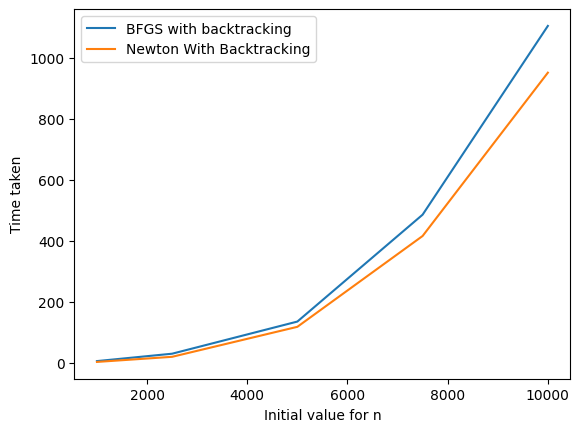

In [ ]:
#plotting for g(x) to show that Newton's Method is Faster than BFGS

import matplotlib.pyplot as plt

#this is collected from the data printed above
n = [1000,2500,5000,7500,10000]
t_bfgs = [4.68, 28.93, 134.43, 485.26,1104.86]
t_newton = [1.97, 18.73, 117.18, 415.33, 951.41]

plt.plot(n, t_bfgs)
plt.plot(n, t_newton)
plt.xlabel('Initial value for n')
plt.ylabel('Time taken')
plt.legend(["BFGS with backtracking", "Newton With Backtracking"])
plt.show()